In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
from config import DESCRIPTOR_SIZE
from data import get_images, IMG_SIZE
from classification import get_embeddings
import models
import tensorflow as tf

DATASET_DIR = "../../data/fruit"

with open("../../data/classes_fruit.txt") as file:
    classes = [line.strip() for line in file]

X, y = get_images(DATASET_DIR, classes, IMG_SIZE)

X = np.array(X)
X = tf.keras.applications.inception_v3.preprocess_input(X)
y = np.array(y)

embedding_model = models.triplet_network_ohnm
embedding_model.load_weights('../models/embedding')
X_embeddings, y_embeddings = get_embeddings(embedding_model, X, y)

columns = ["x" + str(i) for i in range(DESCRIPTOR_SIZE)] + ["y"]
df = pd.DataFrame(np.column_stack([X_embeddings, y_embeddings]), columns=columns)
df = df.astype({"y": int})
df

,x0,x1,y
0,0.061523,0.998106,0
1,0.896494,-0.443055,0
2,0.073455,0.997299,0
3,0.066758,0.997769,0
4,0.953832,0.300342,3
5,0.944404,0.328788,3
6,0.999564,-0.029530,3
7,0.970392,0.241535,3
8,0.330199,-0.943911,4
9,-0.315449,-0.948943,4


In [3]:
df = df.astype({"y": int})
df.describe()

,x0,x1,y
count,20.000000,20.000000,20.000000
mean,0.132390,-0.175665,2.000000
std,0.721928,0.693195,1.450953
min,-0.999732,-0.999711,0.000000
25%,-0.327003,-0.852934,1.000000
50%,0.070106,-0.128973,2.000000
75%,0.865482,0.256237,3.000000
max,0.999564,0.998106,4.000000


In [7]:
random_sample = random.randrange(len(df))
test = df.iloc[random_sample].to_numpy()
test

array([-0.99146354,  0.13038407,  1.        ])

In [8]:
from scipy.spatial import distance

df_distance = df.drop(random_sample)
X_support = df_distance.iloc[:, :DESCRIPTOR_SIZE]
X_query = test[:-1]
diff = X_support.sub(X_query)
df_distance['distance'] = np.linalg.norm(diff, axis=1)
df_distance['cosine'] = df_distance.apply(lambda row: distance.cosine(row[:2], X_query), axis=1)
df_distance = df_distance.sort_values(by='cosine')
closest = df_distance.iloc[0].to_numpy()
df_distance

,x0,x1,y,distance,cosine
12,-0.992586,0.121544,1,0.008911,0.000040
15,-0.999732,0.023168,1,0.107534,0.005782
13,-0.973564,-0.228416,1,0.359246,0.064529
11,-0.361667,-0.932307,4,1.235296,0.762978
9,-0.315449,-0.948943,4,1.273555,0.810971
0,0.061523,0.998106,0,1.364449,0.930861
3,0.066758,0.997769,0,1.368280,0.936095
2,0.073455,0.997299,0,1.373169,0.942796
10,-0.031744,-0.999496,4,1.482461,1.098845
18,-0.024032,-0.999711,2,1.487629,1.106520


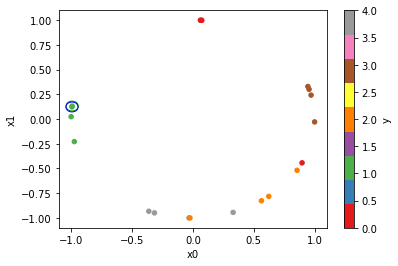

In [9]:
df.plot.scatter(x='x0', y='x1', c='y', colormap='Set1', sharex=False)
circle_true = plt.Circle((closest[0], closest[1]), 0.05, color='b', fill=False)
circle_test = plt.Circle((test[0], test[1]), 0.05, color='g', fill=False)
#circle_debug = plt.Circle((df_distance['x0'][12], df_distance['x1'][12]), 0.05, color='r', fill=False)
ax = plt.gca()
ax.add_artist(circle_test)
ax.add_artist(circle_true)
#ax.add_artist(circle_debug)